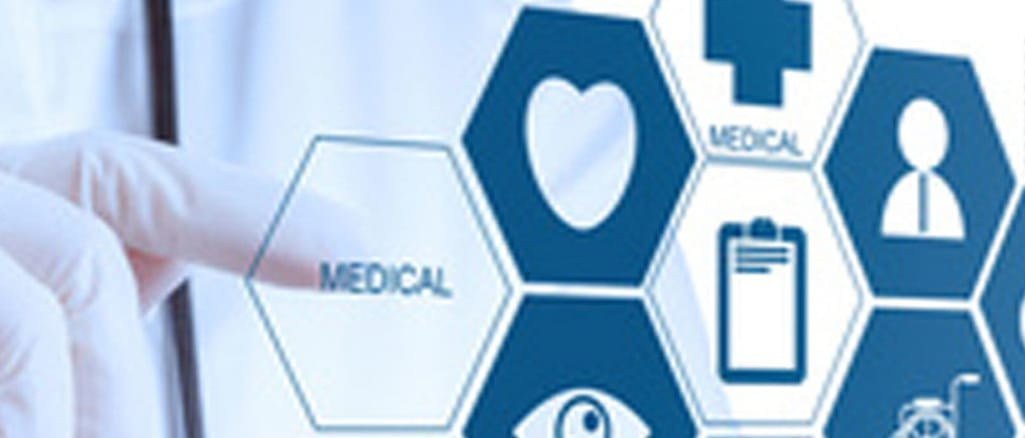

# **Import Libraries**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 1: Reading & Understanding the Data**

In [86]:
# Read the dataset
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
df.shape

(1338, 7)

In [88]:
# Check datatype for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Step 2: Data Cleaning and Preparation**

In [89]:
#checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [90]:
#checking duplicate values
df.duplicated().sum()

1

In [91]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [92]:
# summary of variables
continous=["age","bmi","charges"]
discrete_count=["children"]
categorical=["sex","smoker","region"]

In [93]:
# Summary Statistics for numerical attrubires
df[continous].describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487
std,14.044333,6.100468,12110.359656
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,53.130000,63770.428010


In [94]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [95]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [96]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4])

In [97]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [98]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [99]:
df["sex"].value_counts()


sex
male      675
female    662
Name: count, dtype: int64

In [100]:
df["children"].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [101]:
df["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [102]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

**effects of attributes on each other.**

In [103]:
df[["sex","charges"]].groupby(["sex"],as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")
#We see that men pay more than women.

,sex,charges
1,male,13974.998864
0,female,12569.578844


In [104]:
df[["smoker","charges"]].groupby(["smoker"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")
#We see that smokers pay more than non-smokers.

,smoker,charges
1,yes,32050.231832
0,no,8440.660307


In [105]:
 df[["region","charges"]].groupby(["region"], as_index = False).mean().sort_values(by = "charges",ascending = False).style.background_gradient("Greens")

,region,charges
2,southeast,14735.411438
0,northeast,13406.384516
1,northwest,12450.840844
3,southwest,12346.937377


In [106]:
region= df.groupby("region", as_index=False)[["age","bmi","children","charges"]].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by region \n")
region

Average value of other properties by region 



,region,age,bmi,children,charges
3,southwest,39.455385,30.596615,1.141538,12346.937377
0,northeast,39.268519,29.173503,1.046296,13406.384516
1,northwest,39.259259,29.195494,1.151235,12450.840844
2,southeast,38.939560,33.355989,1.049451,14735.411438


In [107]:
smoker = df.groupby("smoker", as_index=False)[["age","bmi","children","charges"]].mean().sort_values("age",ascending=False).style.background_gradient("Blues")
print("Average value of other properties by smoker \n")
smoker

Average value of other properties by smoker 



,smoker,age,bmi,children,charges
0,no,39.404516,30.651853,1.091251,8440.660307
1,yes,38.514599,30.708449,1.113139,32050.231832


**Step 3: Visualizing the Data**

In [108]:
corr = df.corr(numeric_only=True)

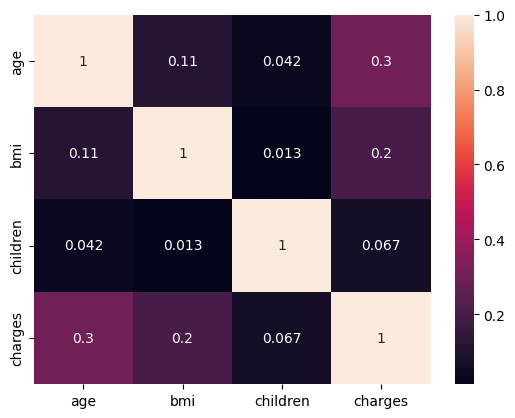

In [109]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

From the heatmap:

we can see the age and bmi are positively correlated variables to charges.

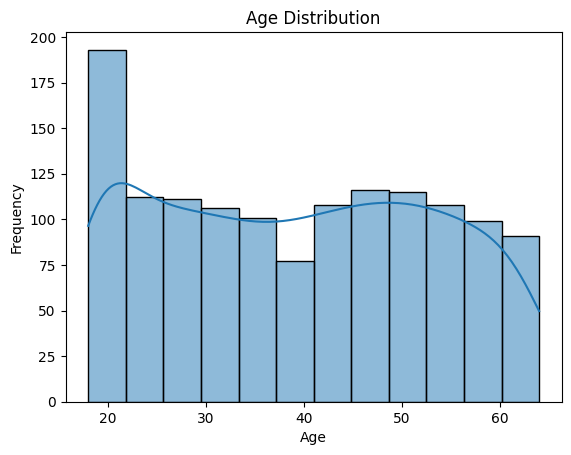

In [110]:
#distribution of ages

sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


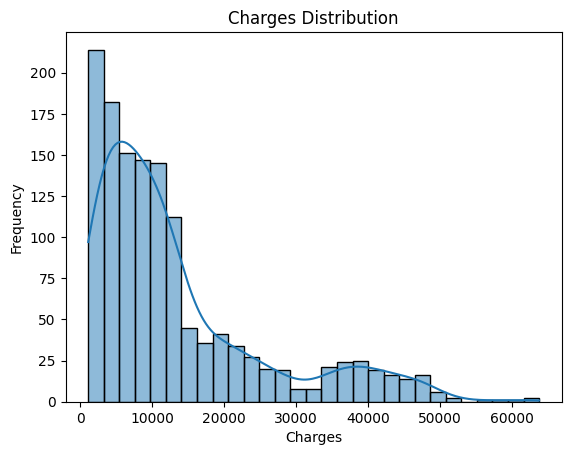

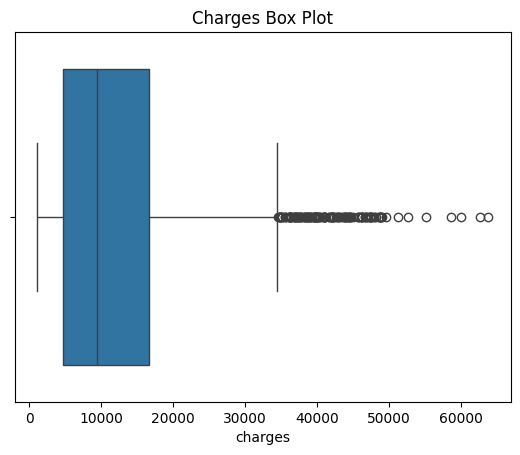

In [111]:
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='charges', data=df)
plt.title('Charges Box Plot')
plt.show()

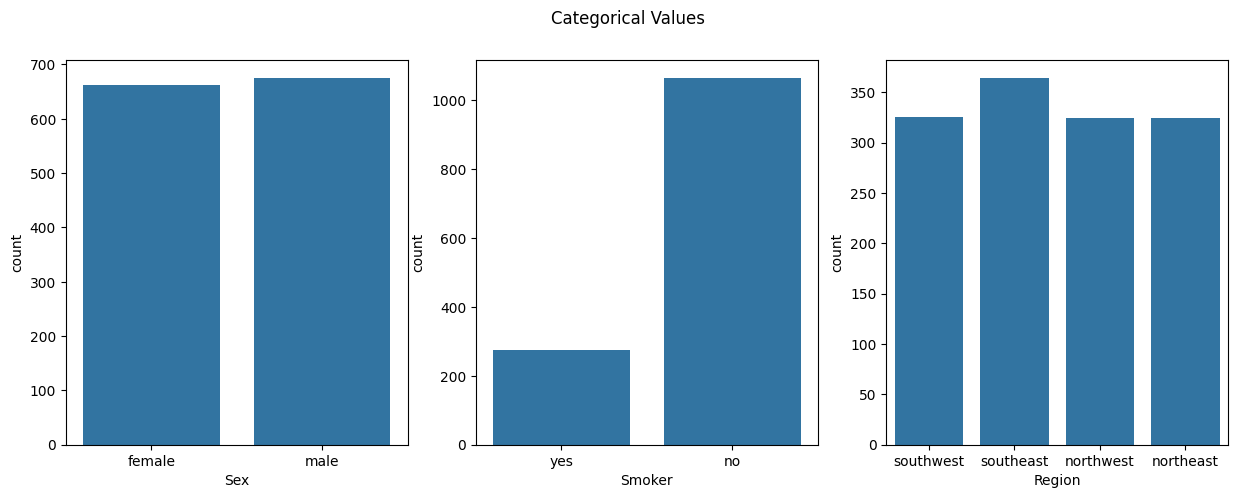

In [112]:
# We will use Subplot
plt.figure(figsize=(15, 5))  # Create a figure with a specified size

# Subplot 1: Countplot for 'sex'
plt.subplot(1, 3, 1)  # Create a subplot with 1 row, 3 columns, and set the current axis to the first subplot
sns.countplot(x='sex', data=df)
plt.xlabel('Sex')

# Subplot 2: Countplot for 'smoker'
plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=df)
plt.xlabel('Smoker')

# Subplot 3: Countplot for 'region'
plt.subplot(1, 3, 3)
sns.countplot(x='region', data=df)
plt.xlabel('Region')

plt.suptitle('Categorical Values')  # Add a centered title above all subplots
plt.show()

<Axes: ylabel='count'>

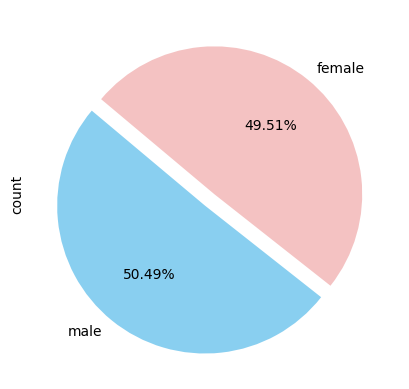

In [113]:
# Pie chart
colors = ['#89CFF0','#F4C2C2']
categories = ['male', 'female']
df['sex'].value_counts().plot(kind='pie',labels=categories,explode = [0.1, 0], colors = colors, startangle = 140 , autopct ="%.2f%%")

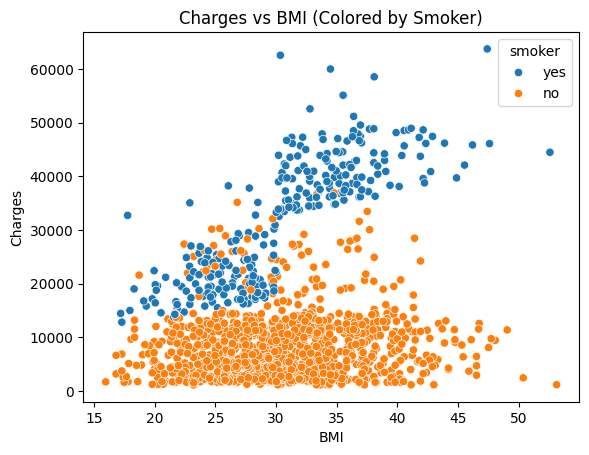

In [114]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Charges vs BMI (Colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

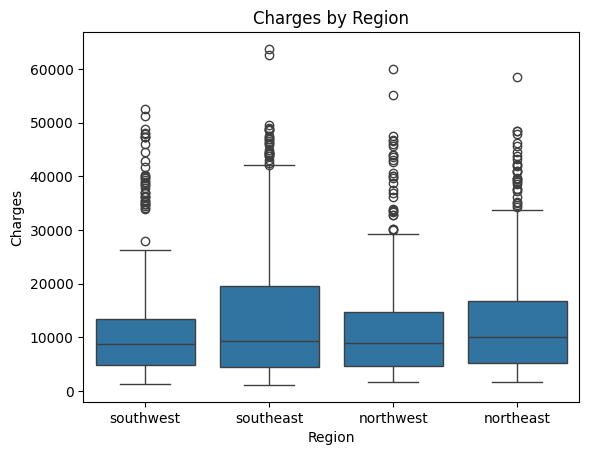

In [115]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# Step 4: Featue Engineering

In [116]:
#Converting categorical variables into integers
df["sex"]   .replace({"female":0 ,"male":1},    inplace=True)
df["smoker"].replace({"no":0 ,"yes":1},      inplace=True)
df["region"].replace({'southwest':0 , 'southeast':1, 'northwest':2, 'northeast':3},inplace=True)

In [117]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

# **Step 5: Model Building & Machine Learning**

In [118]:
#Splitting data into input features and target
x = df.drop("charges",axis = 1)
y = df["charges"]

In [119]:
#Splitting dataset into Traing and Testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

**Linear Regression Model**

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
LR = LinearRegression()

LR.fit(x_train, y_train)
preds_lm_test = LR.predict(x_test)

**Model Evaluation**

In [122]:
from sklearn.metrics import r2_score, mean_squared_error

In [123]:
# Now lets see if our model is good
print(r2_score(y_test, preds_lm_test))

0.8068466322629112


The accuracy in Random Forest model (R-Squared) is 80%

**RandomForestRegressor Model**

In [124]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r2}")

R-squared (R²): 0.8841808949183487


**GradientBoostingRegressor Model**

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(x_train, y_train)
# Make predictions on the test data
y_pred = Gradient_model.predict(x_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R²): {r2}")

R-squared (R²): 0.9005469848709868


The accuracy in gradientboosting regression model (R-Squared) is 90%